### GEOG0051

Mining Social and Geographic Datasets
-----------------------------------

Mobility Patterns Analysis in Cambridge
-------------------------------

**Note about codes retrieved from other sources**

The some parts of scripts used in this project are adapted from practical sessions of GEOG0115 Module taught at UCL created by Stephen Law, Igor Tkalec, Thomas Keel, and Gong Jie. The other sources will be noted where relevant.


## 1. Data Importing

### Gowalla Users in Cambridge

On Gowalla, users were able to check in at different locations across the course of the day.

 is a subset of Gowalla users located in Cambridge, UK from the Stanford University,
Stanford Network Analysis Project. The data has been anonymised (personal identifier removed). However, you could still
trace the location of particular individuals, according to their check-in locations.
For further information, the entire dataset is available at https://snap.stanford.edu/data/loc-gowalla.html

The variables contained in the dataset (which should be self-explanatory), provided in the `Cambridge_gowalla.csv` file, are:

* `User_ID`, or the unique identifier of the user, e.g. 196514
* `check-in-date`, e.g. 2010-07-24
* `check-in-time`, e.g. 13:45:06
* `latitude`, e.g. 53.3648119
* `longitude`, e.g. -2.2723465833
* `loc_id`, or the unique identifier of the location, e.g. 145064

In [1]:
#importing necessary packages for this project

##data managament

import numpy as np #for numeric calculations with more complex data structures
import pandas as pd #for data importing, wrangling and cleaning

##data visualisation

import matplotlib.pyplot as plt #for plots and data visualisation
import seaborn as sns #for plots and data visualisation
import geopandas as gpd #for geospatial data management and mapping
import contextily as ctx #for retrieving basemaps from the internet
import scipy.stats #shapiro-wilk test for normality
from scipy.stats import norm #for normal distribution curve


import osmnx as ox # this line imports osmnx
import networkx as nx # this line imports networkx
import matplotlib.cm as cm
import matplotlib.colors as colors


from folium import FeatureGroup, LayerControl, Map, Marker
#from folium.plugins import HeatMap

# Import Map, Marker, Icon, Polyline from "folium" library. 
from folium import Map, Marker, Icon, PolyLine

##ignore warnings

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#importing the postcode coordinates

gowalla_df = pd.read_csv("Data/Cambridge_gowalla.csv")

gowalla_df.head()


ID  User_ID        date      Time       lon        lat   loc_ID
0   1      382  12/09/2010  08:46:10  0.102380  52.173123  1307095
1   2     1050  14/08/2010  07:34:30  0.123451  52.197975  1735486
2   3     1050  14/08/2010  07:31:37  0.122774  52.197910   654162
3   4     1050  13/08/2010  21:07:46  0.116429  52.210057   516769
4   5     1050  13/08/2010  21:07:38  0.116200  52.210010    21381

In [4]:
gowalla_gdf = gpd.GeoDataFrame(
    gowalla_df, 
    geometry=gpd.points_from_xy(gowalla_df.lon, 
                                      gowalla_df.lat)).set_crs(epsg=4326)

gowalla_gdf = gowalla_gdf.to_crs("EPSG:27700")
gowalla_gdf.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

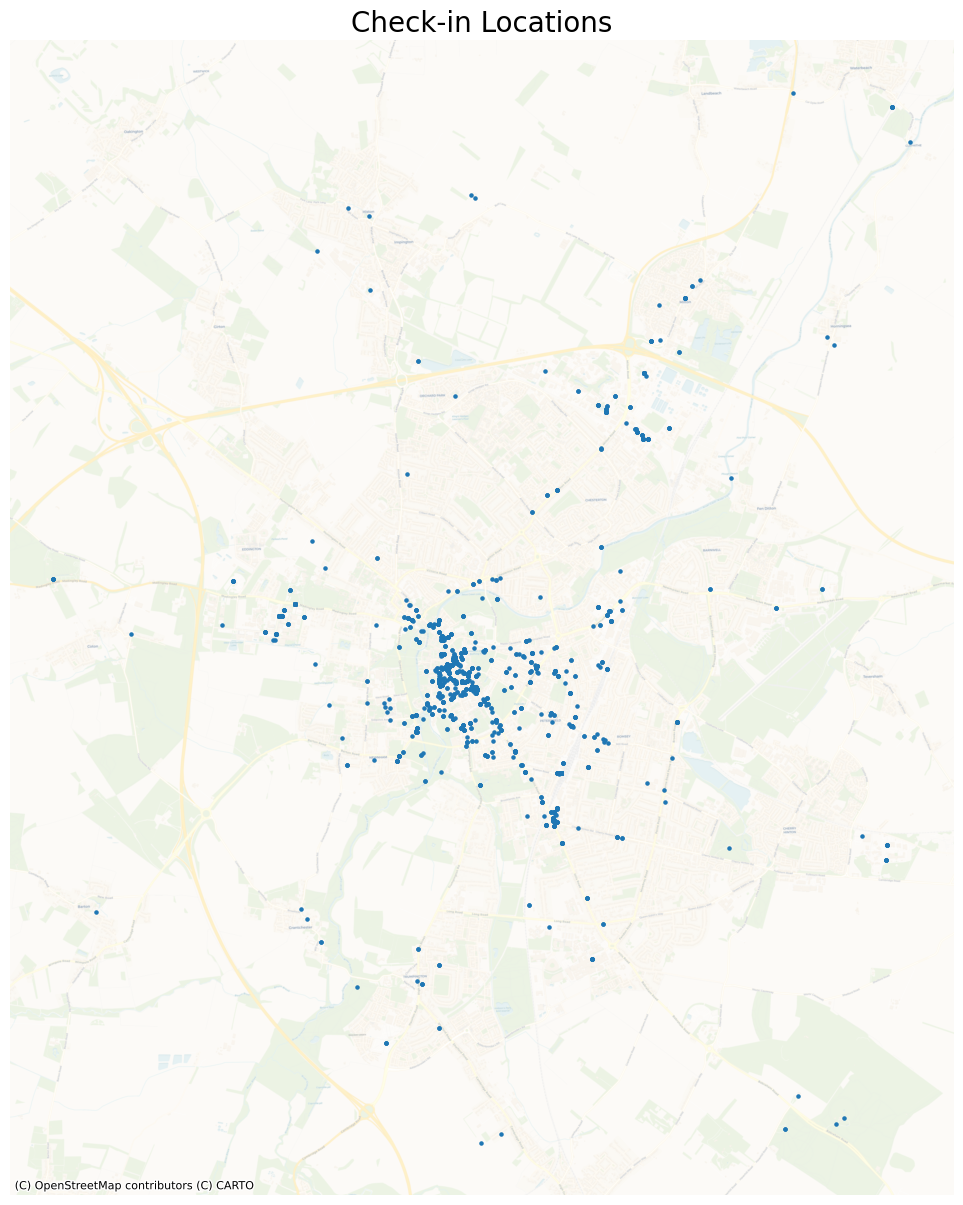

In [34]:
import contextily as ctx #for retrieving basemaps from the internet


#mapping housing price distribution in London without dealing with outliers

fig, ax = plt.subplots(figsize=(15, 15))


ax.set_aspect('equal')


gowalla_gdf.plot(ax=ax,marker='o', markersize=5,legend=True)


# this adds the basemap
ctx.add_basemap(ax, crs=gowalla_gdf.crs, alpha=0.6, source=ctx.providers.CartoDB.Voyager, zoom =15)


# this sets the title
ax.set_title("Check-in Locations",fontsize= 20)

# this removes the axis
ax.set_axis_off()

In [5]:
filter = (gowalla_gdf["User_ID"]==75027) | (gowalla_gdf["User_ID"]==102829)
                      
gowalla_gdf_users = gowalla_gdf[filter == True]

gowalla_gdf_users

ID  User_ID        date      Time       lon        lat  loc_ID  \
1187  1188    75027  01/04/2010  12:29:16  0.174108  52.210701  145499   
1188  1189    75027  01/04/2010  12:28:05  0.163211  52.212771  395408   
1189  1190    75027  20/03/2010  21:53:16  0.122806  52.203341  758004   
1190  1191    75027  19/03/2010  13:30:43  0.144424  52.211325  374196   
1191  1192    75027  19/03/2010  13:29:00  0.146594  52.209822  373382   
...    ...      ...         ...       ...       ...        ...     ...   
1425  1426   102829  19/04/2010  17:53:29  0.110528  52.196678  963000   
1426  1427   102829  19/04/2010  11:20:43  0.090578  52.209531  536286   
1427  1428   102829  19/04/2010  10:07:51  0.094001  52.212543  373983   
1428  1429   102829  18/04/2010  10:51:26  0.123230  52.205475  387227   
1429  1430   102829  17/04/2010  19:12:37  0.110528  52.196678  963000   

                           geometry  
1187  POINT (548644.412 259169.485)  
1188  POINT (547893.079 259377.441)  
1189  POINT (545163.553 258247.098)  
1190  POINT (546614.370 259178.477)  
1191  POINT (546767.565 259015.719)  
...                             ...  
1425  POINT (544346.181 257481.636)  
1426  POINT (542941.531 258871.545)  
1427  POINT (543165.703 259213.205)  
1428  POINT (545185.543 258485.262)  
1429  POINT (544346.181 257481.636)  

[142 rows x 8 columns]

In [ ]:
#mapping housing price distribution in London without dealing with outliers

fig, ax = plt.subplots(figsize=(15, 15))


ax.set_aspect('equal')


gowalla_gdf_users.plot(ax=ax,marker='o', markersize=5,legend=True)

# this adds the basemap
ctx.add_basemap(ax, crs=gowalla_gdf.crs, alpha=0.6, source=ctx.providers.CartoDB.Voyager, zoom =15)

# this sets the title
ax.set_title("Check-in Locations",fontsize= 20)

# this removes the axis
ax.set_axis_off()

In [6]:
filter_75027 = (gowalla_gdf["User_ID"]==75027) & (gowalla_gdf["date"]=="30/01/2010")

filter_102829 = (gowalla_gdf["User_ID"]==102829) & (gowalla_gdf["date"]=="24/05/2010")

filter_twousers = ((gowalla_gdf["User_ID"]==75027) & (gowalla_gdf["date"]=="30/01/2010")) | ((gowalla_gdf["User_ID"]==102829) & (gowalla_gdf["date"]=="24/05/2010"))


gowalla_gdf_75027 = gowalla_gdf[filter_75027 == True]

gowalla_gdf_102829 = gowalla_gdf[filter_102829 == True]

gowalla_gdf_twousers = gowalla_gdf[filter_twousers == True]



In [7]:
gowalla_gdf_75027

ID  User_ID        date      Time       lon        lat  loc_ID  \
1219  1220    75027  30/01/2010  22:14:11  0.123643  52.202858  473651   
1220  1221    75027  30/01/2010  21:27:50  0.127612  52.198955   31328   
1221  1222    75027  30/01/2010  17:20:55  0.144424  52.211325  374196   
1222  1223    75027  30/01/2010  17:05:41  0.144786  52.209487  159331   
1223  1224    75027  30/01/2010  16:59:45  0.146594  52.209822  373382   
1224  1225    75027  30/01/2010  16:15:35  0.144826  52.205650  478191   
1225  1226    75027  30/01/2010  16:06:57  0.144522  52.205200  478133   
1226  1227    75027  30/01/2010  16:04:04  0.145606  52.204923   31968   
1227  1228    75027  30/01/2010  15:13:43  0.173005  52.157223  477840   

                           geometry  
1219  POINT (545222.319 258195.056)  
1220  POINT (545506.261 257768.949)  
1221  POINT (546614.370 259178.477)  
1222  POINT (546645.154 258974.816)  
1223  POINT (546767.565 259015.719)  
1224  POINT (546660.514 258548.236)  
1225  POINT (546641.226 258497.530)  
1226  POINT (546716.237 258468.954)  
1227  POINT (548747.314 253220.021)

In [8]:
gowalla_gdf_102829

ID  User_ID        date      Time       lon        lat   loc_ID  \
1368  1369   102829  24/05/2010  20:34:44  0.110121  52.196113  1024097   
1369  1370   102829  24/05/2010  18:46:53  0.118662  52.208558    21375   
1370  1371   102829  24/05/2010  17:49:04  0.117664  52.210026   558662   
1371  1372   102829  24/05/2010  17:33:12  0.117766  52.203666    21357   
1372  1373   102829  24/05/2010  17:16:12  0.114811  52.194001  1166464   
1373  1374   102829  24/05/2010  14:20:06  0.094001  52.212543   373983   
1374  1375   102829  24/05/2010  12:14:26  0.090578  52.209531   536286   
1375  1376   102829  24/05/2010  10:58:54  0.137495  52.194409    21356   

                           geometry  
1368  POINT (544320.150 257417.928)  
1369  POINT (544863.405 258819.019)  
1370  POINT (544790.483 258980.287)  
1371  POINT (544818.105 258273.204)  
1372  POINT (544647.518 257192.406)  
1373  POINT (543165.703 259213.205)  
1374  POINT (542941.531 258871.545)  
1375  POINT (546196.506 257283.281)

In [9]:
gowalla_gdf_twousers

ID  User_ID        date      Time       lon        lat   loc_ID  \
1219  1220    75027  30/01/2010  22:14:11  0.123643  52.202858   473651   
1220  1221    75027  30/01/2010  21:27:50  0.127612  52.198955    31328   
1221  1222    75027  30/01/2010  17:20:55  0.144424  52.211325   374196   
1222  1223    75027  30/01/2010  17:05:41  0.144786  52.209487   159331   
1223  1224    75027  30/01/2010  16:59:45  0.146594  52.209822   373382   
1224  1225    75027  30/01/2010  16:15:35  0.144826  52.205650   478191   
1225  1226    75027  30/01/2010  16:06:57  0.144522  52.205200   478133   
1226  1227    75027  30/01/2010  16:04:04  0.145606  52.204923    31968   
1227  1228    75027  30/01/2010  15:13:43  0.173005  52.157223   477840   
1368  1369   102829  24/05/2010  20:34:44  0.110121  52.196113  1024097   
1369  1370   102829  24/05/2010  18:46:53  0.118662  52.208558    21375   
1370  1371   102829  24/05/2010  17:49:04  0.117664  52.210026   558662   
1371  1372   102829  24/05/2010  17:33:12  0.117766  52.203666    21357   
1372  1373   102829  24/05/2010  17:16:12  0.114811  52.194001  1166464   
1373  1374   102829  24/05/2010  14:20:06  0.094001  52.212543   373983   
1374  1375   102829  24/05/2010  12:14:26  0.090578  52.209531   536286   
1375  1376   102829  24/05/2010  10:58:54  0.137495  52.194409    21356   

                           geometry  
1219  POINT (545222.319 258195.056)  
1220  POINT (545506.261 257768.949)  
1221  POINT (546614.370 259178.477)  
1222  POINT (546645.154 258974.816)  
1223  POINT (546767.565 259015.719)  
1224  POINT (546660.514 258548.236)  
1225  POINT (546641.226 258497.530)  
1226  POINT (546716.237 258468.954)  
1227  POINT (548747.314 253220.021)  
1368  POINT (544320.150 257417.928)  
1369  POINT (544863.405 258819.019)  
1370  POINT (544790.483 258980.287)  
1371  POINT (544818.105 258273.204)  
1372  POINT (544647.518 257192.406)  
1373  POINT (543165.703 259213.205)  
1374  POINT (542941.531 258871.545)  
1375  POINT (546196.506 257283.281)

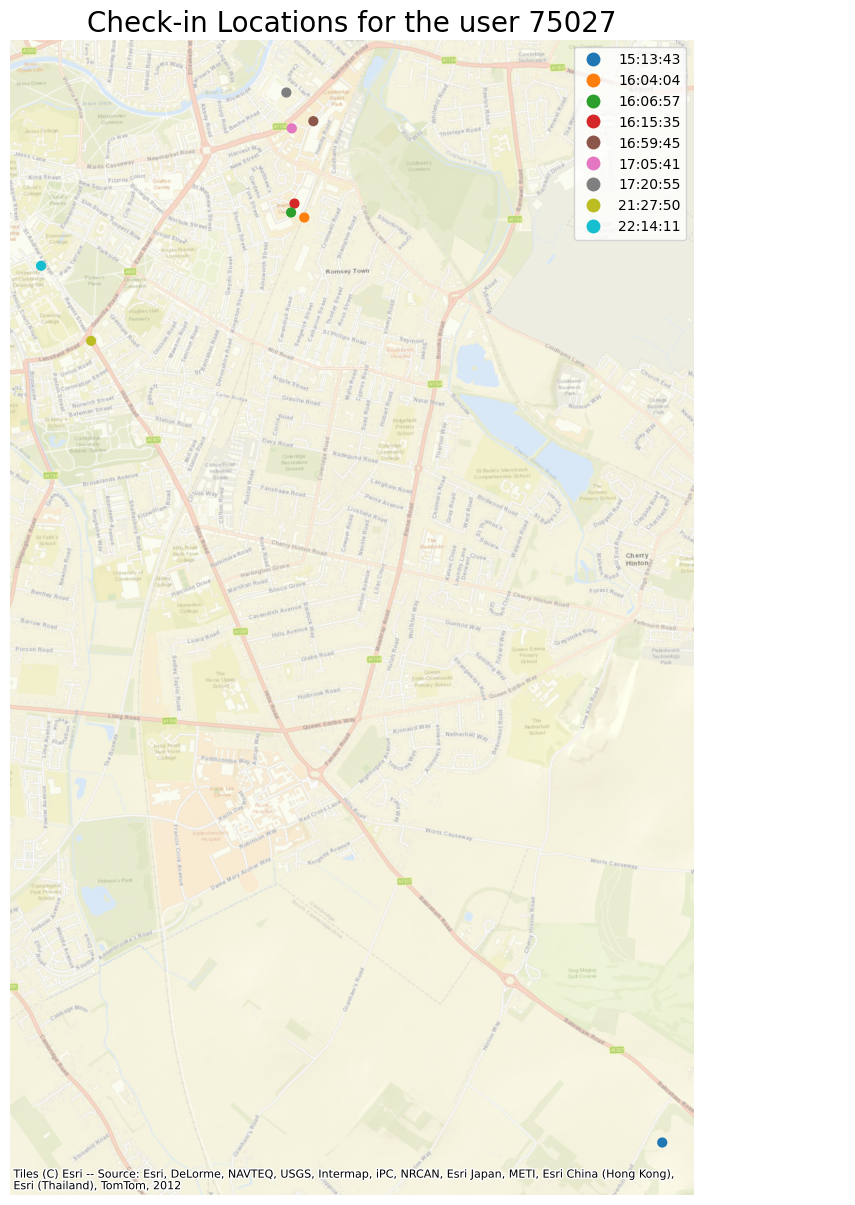

In [17]:
#mapping housing price distribution in London without dealing with outliers

fig, ax = plt.subplots(figsize=(15, 15))


ax.set_aspect('equal')

# this adds the basemap

gowalla_gdf_75027.plot(ax=ax,marker='o',markersize=40,legend=True, column = "Time")

ctx.add_basemap(ax, crs=gowalla_gdf_twousers.crs, alpha=0.6, source=ctx.providers.Esri.WorldStreetMap, zoom =15)


# this sets the title
ax.set_title("Check-in Locations for the user 75027",fontsize= 20)

# this removes the axis
ax.set_axis_off()

## 4. Provide Characterisation of the Gowalla dataset

### 4.1. Driving

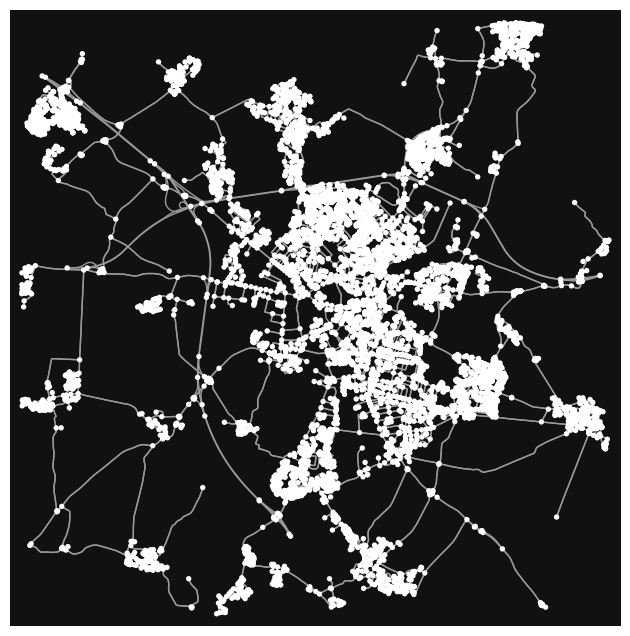

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [10]:
graph=ox.graph_from_address('Cambridge, UK',dist=7500,network_type='drive')
ox.plot_graph(graph)


In [11]:
gowalla_gdf_75027_sorted = gowalla_gdf_75027.sort_values(by=['Time'], ascending=True).reset_index()

gowalla_gdf_75027_sorted

index    ID  User_ID        date      Time       lon        lat  loc_ID  \
0   1227  1228    75027  30/01/2010  15:13:43  0.173005  52.157223  477840   
1   1226  1227    75027  30/01/2010  16:04:04  0.145606  52.204923   31968   
2   1225  1226    75027  30/01/2010  16:06:57  0.144522  52.205200  478133   
3   1224  1225    75027  30/01/2010  16:15:35  0.144826  52.205650  478191   
4   1223  1224    75027  30/01/2010  16:59:45  0.146594  52.209822  373382   
5   1222  1223    75027  30/01/2010  17:05:41  0.144786  52.209487  159331   
6   1221  1222    75027  30/01/2010  17:20:55  0.144424  52.211325  374196   
7   1220  1221    75027  30/01/2010  21:27:50  0.127612  52.198955   31328   
8   1219  1220    75027  30/01/2010  22:14:11  0.123643  52.202858  473651   

                        geometry  
0  POINT (548747.314 253220.021)  
1  POINT (546716.237 258468.954)  
2  POINT (546641.226 258497.530)  
3  POINT (546660.514 258548.236)  
4  POINT (546767.565 259015.719)  
5  POINT (546645.154 258974.816)  
6  POINT (546614.370 259178.477)  
7  POINT (545506.261 257768.949)  
8  POINT (545222.319 258195.056)

https://towardsdatascience.com/shortest-path-algorithm-used-in-osm-street-network-33e0f864f34b

In [44]:
def shortest_path(origin, destination, network = "drive"):
    

 # routes of shortest path
    routes = gpd.GeoDataFrame()
 
 # Get nodes from the graph
    nodes = ox.graph_to_gdfs(graph_proj, edges=False)
 
 # Iterate over origins and destinations
    for oidx, orig in origin_proj.iterrows():
 
   # Find closest node from the graph → point = (latitude, longitude)
        closest_origin_node = ox.get_nearest_node(G=graph_proj, point=(orig.geometry.y, orig.geometry.x))
 
   # Iterate over targets
    for tidx, target in destination_proj.iterrows():
        
      # Find closest node from the graph → point = (latitude, longitude)
        closest_target_node = ox.get_nearest_node(graph_proj, point=(target.geometry.y, target.geometry.x))
      # Check if origin and target nodes are the same → if they are → skip
        if closest_origin_node == closest_target_node:
            print("Same origin and destination node. Skipping ..")
            continue
 
       # Find the shortest path between the points
        route = nx.shortest_path(graph_proj, 
        source=closest_origin_node, 
        target=closest_target_node, weight="length")
 
       # Extract the nodes of the route
        route_nodes = nodes.loc[route]
 
       # Create a LineString out of the route
        path = LineString(list(route_nodes.geometry.values))
 
       # Append the result into the GeoDataFrame
        routes = routes.append([[path]], ignore_index=True)
 # Add a column name
    routes.columns = ["geometry"]
 
 # Set coordinate reference system
    routes.crs = nodes.crs
 # Set geometry
    routes = routes.set_geometry("geometry")
    
    return routes

In [12]:

lst0 = []
lst0.append(gowalla_gdf_75027_sorted.loc[0]["lat"].item())
lst0.append(gowalla_gdf_75027_sorted.loc[0]["lon"].item())



lst1 = []
lst1.append(gowalla_gdf_75027_sorted.loc[1]["lat"].item())
lst1.append(gowalla_gdf_75027_sorted.loc[1]["lon"].item())

lst2 = []
lst2.append(gowalla_gdf_75027_sorted.loc[2]["lat"].item())
lst2.append(gowalla_gdf_75027_sorted.loc[2]["lon"].item())

lst3 = []
lst3.append(gowalla_gdf_75027_sorted.loc[3]["lat"].item())
lst3.append(gowalla_gdf_75027_sorted.loc[3]["lon"].item())



In [16]:

routes = []

# Create an empty GeoDataFrame to hold the routes
routes_gdf = gpd.GeoDataFrame()


for index, row in gowalla_gdf_75027_sorted.iterrows():
     if index != len(gowalla_gdf_75027_sorted) - 1:
        origin_node = ox.distance.nearest_nodes(graph, X=gowalla_gdf_75027_sorted.loc[index, 'lon'], Y=gowalla_gdf_75027_sorted.loc[index, 'lat'])
        destination_node = ox.distance.nearest_nodes(graph, X=gowalla_gdf_75027_sorted.loc[index+1, 'lon'], Y=gowalla_gdf_75027_sorted.loc[index+1, 'lat'])
        route = nx.shortest_path(graph, origin_node, destination_node, weight='length')
        routes.append(route)
        
        route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, route, 'length'))
        
        route_gdf = ox.route_to_gdf(route)
        routes_gdf = gpd.GeoDataFrame(pd.concat([routes_gdf, route_gdf], ignore_index=True))

# Print the GeoDataFrame

# print the calculated route length and distance
        print(f"Route length {index} to {index+1}: {route_length:.2f} meters")


AttributeError: module 'osmnx' has no attribute 'route_to_gdf'

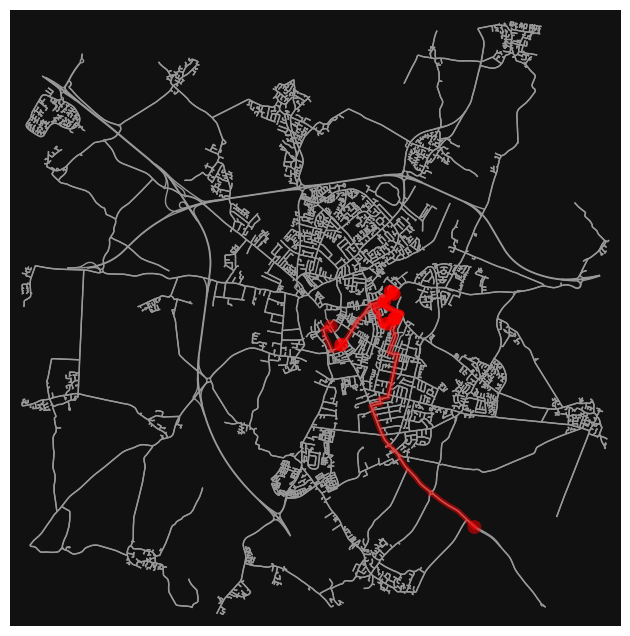

In [57]:
fig, ax = ox.plot_graph_routes(graph, routes,route_linewidth=6, node_size=0)


In [36]:
    route_nodes = nodes.loc[route]
 
       # Create a LineString out of the route
    path = LineString(list(route_nodes.geometry))
 
       # Append the result into the GeoDataFrame
    routes = routes.append([[path]], ignore_index=True)
    length = nx.shortest_path_length(graph, source=origin_node, target=destination_node, weight='length')
    length_75027.append(length)

    
 # Add a column name
routes.columns = ["geometry"]
 
 # Set coordinate reference system
routes.crs = nodes.crs
 # Set geometry
routes = routes.set_geometry("geometry")

routes



print("Shortest path between points {} and {}: {:.2f} meters".format(df['id'][i], df['id'][j], route_length))


TypeError: append() takes no keyword arguments

In [ ]:
length_75027

In [ ]:


routes_projected = routes.set_crs("EPSG:27700")

routes_projected

In [ ]:
route_nodes

In [ ]:
routes_projected['geometry'].length

In [ ]:

import contextily as ctx #for retrieving basemaps from the internet


#mapping housing price distribution in London without dealing with outliers

fig, ax = plt.subplots(figsize=(15, 15))


ax.set_aspect('equal')


routes.plot(ax=ax, markersize=5,legend=True)
route_nodes.to_crs(nodes.crs).plot(ax=ax, markersize=15,legend=True)


# this adds the basemap
ctx.add_basemap(ax, crs=nodes.crs, alpha=0.6, source=ctx.providers.CartoDB.Voyager, zoom =15)


# this sets the title
ax.set_title("Check-in Locations",fontsize= 20)

# this removes the axis
ax.set_axis_off()

[1513021086, 98936372, 2580731394, 18650273, 18650274, 2179905293, 705448024, 526297006, 1572499284, 16713913, 19851346, 20826574, 20826570, 20826563, 527446635, 1480048755, 20826576, 20826577, 19851527, 14913698, 20826601, 20826606]


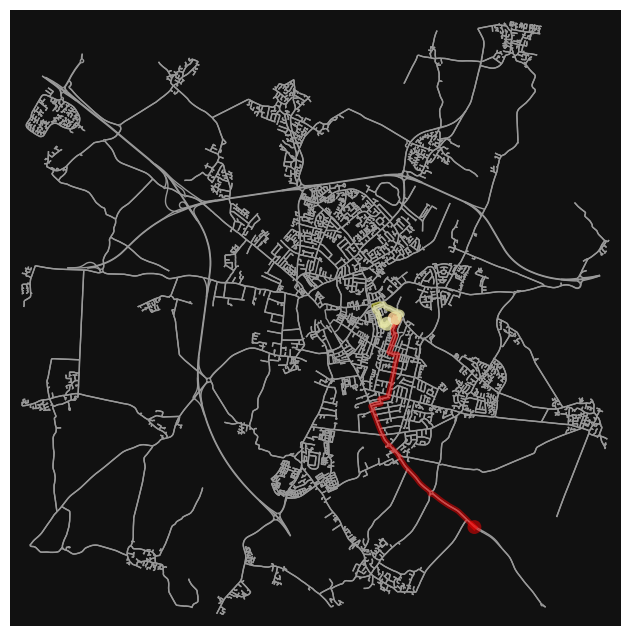

In [37]:
# define origin/desination points then get the nodes nearest to each
origin_point = lst0
destination_point = lst1
origin_node=ox.distance.nearest_nodes(graph, X=origin_point[1],Y=origin_point[0])
destination_node = ox.distance.nearest_nodes(graph, X=destination_point[1],Y=destination_point[0])

# find the shortest path between origin and destination nodes
route = nx.shortest_path(graph, origin_node, destination_node, weight='length')

origin_point1 = lst1
destination_point1 = lst2
origin_node1=ox.distance.nearest_nodes(graph, X=origin_point1[1],Y=origin_point1[0])
destination_node1 = ox.distance.nearest_nodes(graph, X=destination_point1[1],Y=destination_point1[0])
route1 = nx.shortest_path(graph, origin_node1, destination_node1, weight='length')
print(route1)

origin_point2 = lst2
destination_point2 = lst3
origin_node2=ox.distance.nearest_nodes(graph, X=origin_point2[1],Y=origin_point2[0])
destination_node2 = ox.distance.nearest_nodes(graph, X=destination_point2[1],Y=destination_point2[0])
route2 = nx.shortest_path(graph, origin_node2, destination_node2, weight='length')



# plot the route showing origin/destination lat-long points in blue


#the code below is taken from https://stackoverflow.com/questions/51258029/plotting-multiple-routes-with-osmnx

routes = [route, route1,route2]
rc = ['r', 'y',"w"]
fig, ax = ox.plot_graph_routes(graph, routes, route_colors=rc, route_linewidth=6, node_size=0)







In [ ]:
routes

In [ ]:
routes

## 5. Comparative analysis of check-in frequencies and network centrality

In [18]:
# Let's get a smaller graph with a search distance of 800m from the address.
G=ox.graph_from_address('Cambridge, UK',dist=7500,network_type='drive')

# some of the centrality measures are not implemented on multiGraph so first set as diGraph
DG = ox.get_digraph(G)

In [19]:
edge_cc = nx.closeness_centrality(nx.line_graph(DG))


In [20]:
# set or inscribe the centrality measure of each node as an edge attribute of the graph network object
nx.set_edge_attributes(DG,edge_cc,'cc')
G1 = nx.MultiGraph(DG)

In [21]:
# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G1,nodes=False,fill_edge_geometry=True)

# set crs to 3857 (needed for contextily)
gdf_edges = gdf_edges.to_crs(epsg=27700) # setting crs to 3857


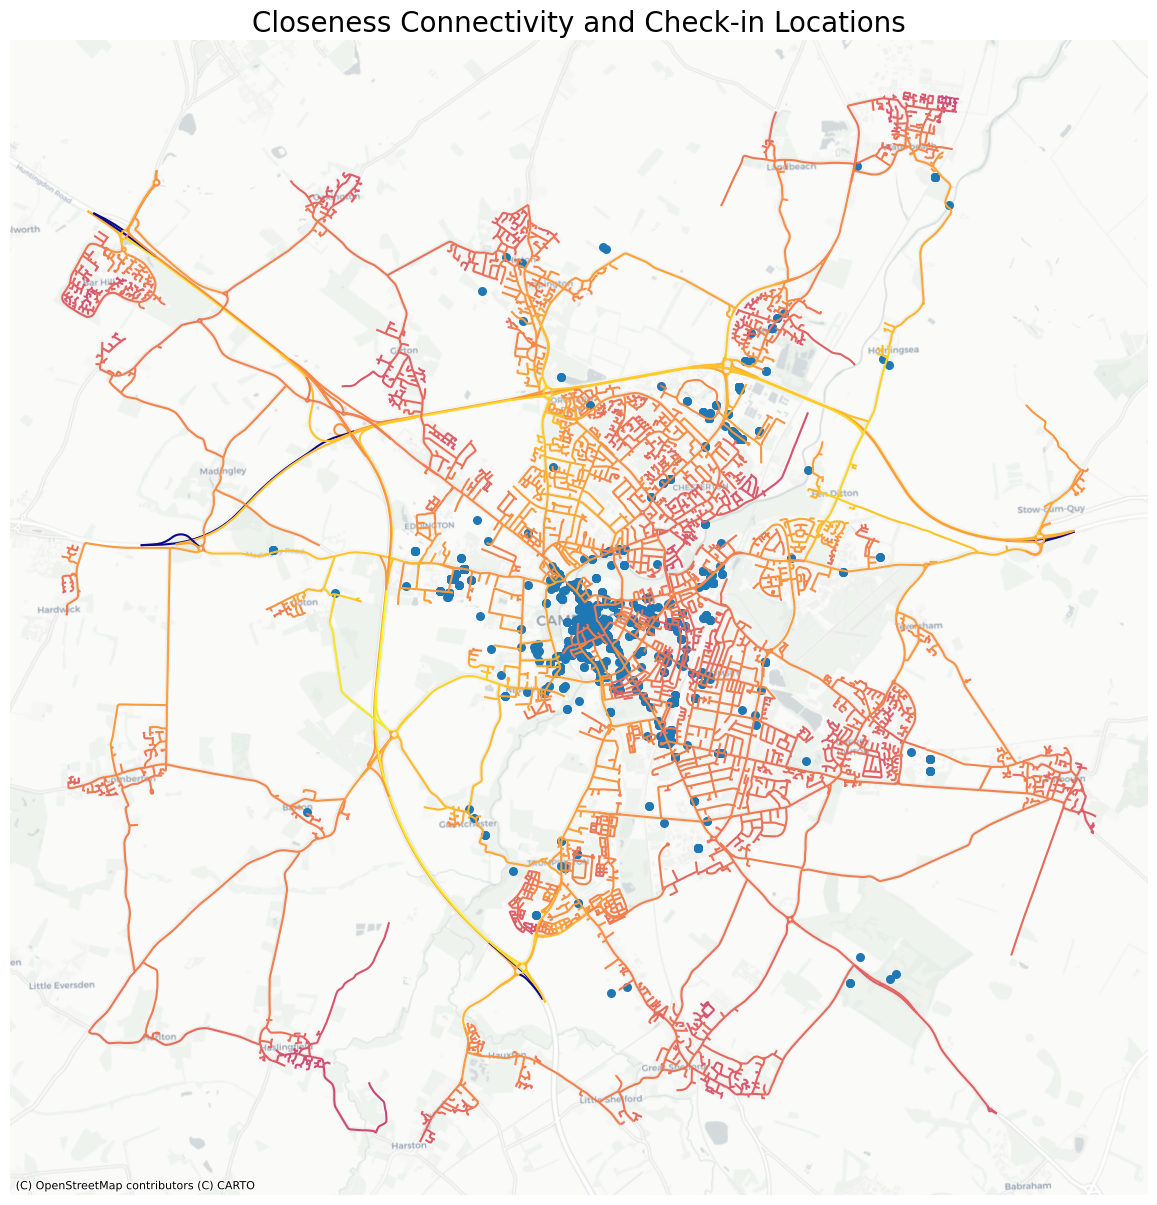

In [43]:
### 3c) Visualise the three graphs from part (b) separately and save the image as a png file. <br />

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect('equal')

gowalla_gdf.to_crs(gdf_edges.crs).plot(ax=ax,marker='o', markersize=30,legend=True)

gdf_edges.plot(ax=ax,column='cc',cmap='plasma')


ctx.add_basemap(ax,crs=gdf_edges.crs,source=ctx.providers.CartoDB.Positron)
# this sets the title
ax.set_title("Closeness Connectivity and Check-in Locations",fontsize= 20)

# this removes the axis
ax.set_axis_off()